# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [20]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.preprocessing import StandardScaler

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [21]:
# loading the data: Wholesale customers data
whole_sale = pd.read_csv('../data/Wholesale customers data.csv')

#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [22]:
# ¿Qué significa cada columna?
print(whole_sale.info())
whole_sale.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# ¿Hay datos categóricos que convertir?
## Ninguna

In [23]:
# ¿Hay que eliminar datos que faltan?
whole_sale.isnull().sum(axis=0)
print('No hay valores nulos')

No hay valores nulos


Text(0.5, 1.0, 'Mapa de correlaciones')

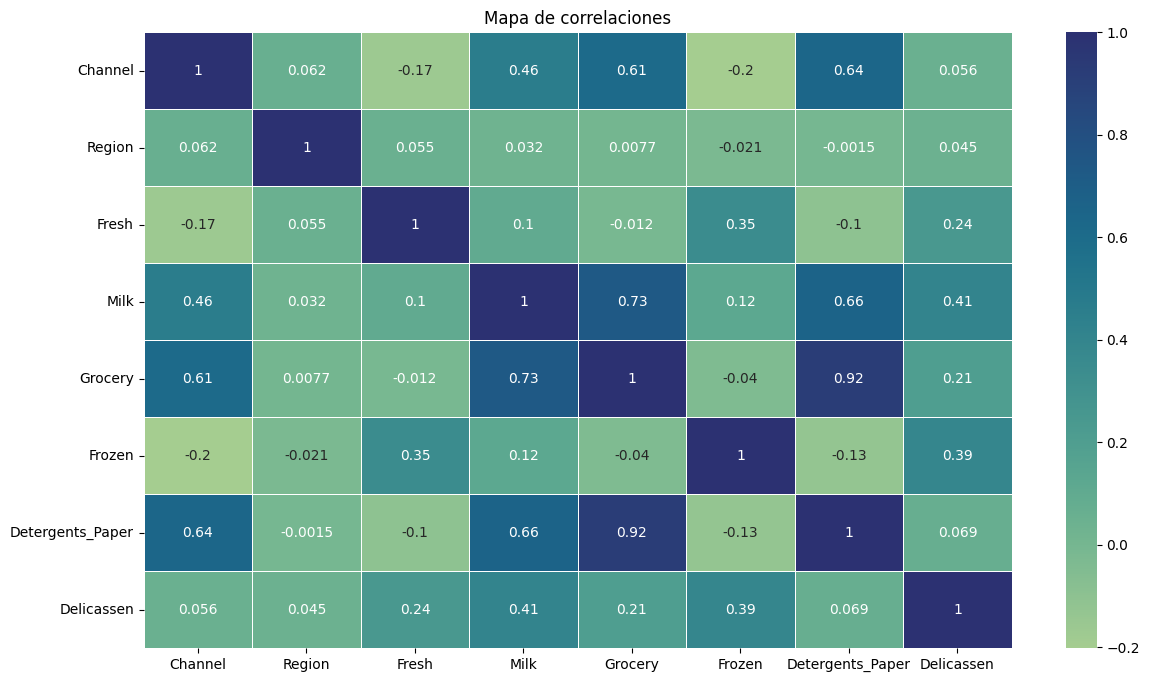

In [24]:
# Colinealidad de columnas: ¿hay correlaciones altas?
plt.figure(figsize=(14,8))
sns.heatmap(whole_sale.corr(),annot=True,linewidths=0.5,cmap="crest")
plt.title('Mapa de correlaciones')

In [25]:
# Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
print(display(whole_sale.describe()))

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


None


In [26]:
# Distribución de los datos por columnas: ¿está sesgada la distribución?

print("Coeficiente de asimetría:", display(whole_sale.skew()))


Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

Coeficiente de asimetría: None


## Análisis de Asimetría en los Datos

Los coeficientes de asimetría calculados para las variables son los siguientes:

| Variable  | Coeficiente de Asimetría | Interpretación                               |
|---------  |---------------------------|-----------------------------------------------|
|   Channel |         0.760951            | Sesgo positivo moderado                       |
|   Region  |        -1.283627            | Sesgo negativo moderado                       |
|   Fresh   |         2.561323           | Sesgo positivo considerable                    |
|   Milk    |         4.053755           | Sesgo positivo considerable                    |
|   Grocery |         3.587429          | Sesgo positivo considerable                    |
|   Frozen  |         5.907986         | Sesgo positivo considerable                    |
|    Detergentes_Paper    |        3.631851            | Sesgo positivo considerable                    |
|    Delicassen    |        11.151586          | Sesgo positivo muy fuerte (valores atípicos altos) |

**Observaciones:**

* Las variables 1, 3, 4, 5, 6, 7 y 8 presentan sesgo positivo, lo que indica que la mayoría de los valores se concentran en la parte baja de la distribución, con algunos valores altos que "tiran" de la media hacia la derecha.
* La variable 2 muestra un sesgo negativo moderado, lo que significa que la mayoría de los valores se concentran en la parte alta de la distribución, con algunos valores bajos que "tiran" de la media hacia la izquierda.
* La variable 8 tiene un sesgo positivo extremadamente fuerte, lo que sugiere la presencia de valores atípicos muy altos que están afectando significativamente la distribución.

## Análisis de Correlaciones en Datos de Ventas

El siguiente análisis se basa en un mapa de correlaciones que muestra las relaciones entre diferentes variables relacionadas con ventas o consumo de productos.

### Correlaciones Fuertes Positivas:

* **Grocery y Detergents_Paper (0.92):** Esta es la correlación más fuerte, lo que indica una alta probabilidad de que estos productos se compren juntos.  
* **Grocery y Milk (0.73):** Los clientes que compran comestibles tienden a comprar leche también.
* **Milk y Detergents_Paper (0.66):** Existe una relación moderadamente fuerte entre estos productos, posiblemente debido a que son artículos básicos comprados con frecuencia.
* **Channel y Grocery (0.61):** El canal de distribución parece influir en las ventas de comestibles.
* **Channel y Detergents_Paper (0.64):** Similar a lo anterior, el canal de distribución también afecta las ventas de productos de limpieza y papel.

### Correlaciones Moderadas:

* **Delicassen y Milk (0.41):** Aunque no tan fuerte como otras relaciones, existe una tendencia a que los clientes que compran productos delicatessen también compren leche.

### Correlaciones Negativas:

* **Frozen y Detergents_Paper (-0.13):** Una ligera correlación negativa sugiere que quienes compran productos congelados podrían comprar menos productos de limpieza y papel.

### Correlaciones Débiles:

* **Region:** La región no muestra una correlación significativa con ninguna categoría de producto, lo que indica patrones de compra similares en todas las regiones.

### Conclusiones:

* **Oportunidades de venta cruzada:** Las fuertes correlaciones entre Grocery, Detergents_Paper y Milk sugieren estrategias de promoción conjuntas o ubicación cercana en tiendas.
* **Estrategia de marketing uniforme:** La falta de correlación con la región indica que una estrategia de marketing general podría ser efectiva en todas las regiones.

### Consideraciones Adicionales:

Es crucial recordar que este análisis se basa únicamente en correlaciones. Para comprender las causas subyacentes de estas relaciones, se requiere un análisis más profundo que incluya factores demográficos, ubicación de tiendas y estrategias de marketing.


# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [27]:
# Your code here

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [28]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
X = whole_sale.drop('Region',axis=1)
y = whole_sale['Region']

X_scaled = StandardScaler().fit_transform(X)
print(np.mean(X_scaled, axis=0))      # Medias de cada columna
print(np.std(X_scaled, axis=0))       # Desviaciones estándar
print(np.min(X_scaled, axis=0))       # Valores mínimos
print(np.max(X_scaled, axis=0))       # Valores máximos

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Mostrar las primeras filas de los datos escalados
X_scaled_df.head()

[ 1.61486985e-17 -3.43159844e-17  0.00000000e+00 -4.03717464e-17
  3.63345717e-17  2.42230478e-17 -8.07434927e-18]
[1. 1. 1. 1. 1. 1. 1.]
[-0.69029709 -0.94968309 -0.77879505 -0.83733437 -0.62834303 -0.60441648
 -0.54026439]
[ 1.44865163  7.92773757  9.18364979  8.93652831 11.91900152  7.96767199
 16.47844745]


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## Análisis de Resultados del Escalamiento Estándar

### Estadísticas Descriptivas:

* **Medias:**
   - Los valores de las medias de cada característica son extremadamente cercanos a cero (e.g., 1.61e-17, -3.43e-17). Esto confirma que el escalamiento estándar ha centrado correctamente las medias de las características en 0.

* **Desviaciones Estándar:**
   - Todas las desviaciones estándar son iguales a 1. Esto indica que el escalamiento estándar ha estandarizado las características, asignándoles la misma escala.

* **Valores Mínimos y Máximos:**
   - Los valores mínimos y máximos muestran el rango de cada característica después del escalamiento. Aunque los rangos varían entre características, ahora están en una escala comparable.

### Conclusiones:

El escalamiento estándar se ha realizado con éxito. Todas las características ahora tienen:

* **Media:** 0
* **Desviación Estándar:** 1

### Implicaciones:

Este escalamiento es crucial para algoritmos de aprendizaje automático sensibles a la escala de las características, como:

* **Modelos Lineales:** Regresión lineal, regresión logística, etc.
* **Máquinas de Vectores de Soporte (SVM):** SVM lineales y no lineales.
* **Algunos Algoritmos de Agrupamiento (Clustering):** K-means, por ejemplo.


# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [29]:
from sklearn.cluster import KMeans

# # Your code here:
kmeans = KMeans(n_clusters=3, random_state=0)  # random_state para reproducibilidad

# Ajustamos el modelo a los datos escalados
kmeans.fit(X_scaled)

# Obtenemos las etiquetas de cluster asignadas por el modelo
labels = kmeans.labels_

# Agregamos una nueva columna 'labels' al DataFrame original con las etiquetas
whole_sale['labels'] = labels

# Mostrar las primeras filas de los datos con la nueva columna labels
whole_sale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


### Viendo el elbow podríamos escoger 2 como el número de clusters correctos

In [14]:
kmeans_2 = KMeans(n_clusters=2,random_state=0).fit(X_scaled)

labels = kmeans_2.predict(X_scaled)

clusters = kmeans_2.labels_.tolist()

Cuenta los valores en `labels`.

In [30]:
# Your code here:
print(whole_sale['labels'].value_counts())


labels
0    297
2    130
1     13
Name: count, dtype: int64


# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [38]:
from sklearn.cluster import DBSCAN 

# Your code here
# Inicialización del modelo DBSCAN
dbscan = DBSCAN(eps=0.5)  # eps es la distancia máxima entre dos muestras para considerarlas vecinas

# Ajustar el modelo a los datos escalados
dbscan.fit(X_scaled)

# Obtener las etiquetas de cluster asignadas por DBSCAN
labels_dbscan = dbscan.labels_

# Agregar las etiquetas a una nueva columna en el DataFrame original
whole_sale['labels_DBSCAN'] = labels_dbscan

# Mostrar las primeras filas de los datos con la nueva columna labels_DBSCAN
whole_sale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,2,3
1,2,3,7057,9810,9568,1762,3293,1776,2,-1
2,2,3,6353,8808,7684,2405,3516,7844,2,-1
3,1,3,13265,1196,4221,6404,507,1788,0,1
4,2,3,22615,5410,7198,3915,1777,5185,2,-1


Cuenta los valores en `labels_DBSCAN`.

In [39]:
# Your code here
whole_sale['labels_DBSCAN'].value_counts()

labels_DBSCAN
 1    201
-1    194
 0     32
 3      8
 2      5
Name: count, dtype: int64

# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [ ]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

In [ ]:
# Your code here:


Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [ ]:
# Your code here:


Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [ ]:
# Your code here:


Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [ ]:
# Your code here:


¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

El rendimiento de los algoritmos...

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
